In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# building, evaluating, and validating machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('merged_data.csv', low_memory=False)
print(f"Dataset size: {df.shape[0]} rows")

Dataset size: 11509051 rows


In [2]:
print("\nDataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


Dataset Overview:
      X     Y     Z       EDA     HR   TEMP  id  \
0 -13.0 -61.0   5.0  6.769995  99.43  31.17  15   
1 -20.0 -69.0  -3.0  6.769995  99.43  31.17  15   
2 -31.0 -78.0 -15.0  6.769995  99.43  31.17  15   
3 -47.0 -65.0 -38.0  6.769995  99.43  31.17  15   
4 -67.0 -57.0 -53.0  6.769995  99.43  31.17  15   

                        datetime  label  
0  2020-07-08 14:03:00.000000000    2.0  
1  2020-07-08 14:03:00.031249920    2.0  
2  2020-07-08 14:03:00.062500096    2.0  
3  2020-07-08 14:03:00.093750016    2.0  
4  2020-07-08 14:03:00.124999936    2.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usa

In [3]:
print("\nChecking for duplicates...")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Checking for duplicates...
Number of duplicate rows: 105606
Duplicates removed.


In [4]:
print("Missing Values Per Column:\n")
print(df.isnull().sum())

# Handle missing values for numeric columns only
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print("Missing values in numeric columns handled.")

Missing Values Per Column:

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64
Missing values in numeric columns handled.


### Data exploration and visualization


Visualizing the distribution of numeric columns...


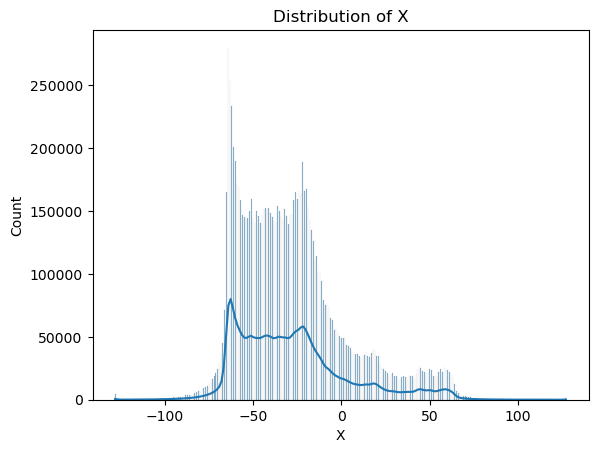

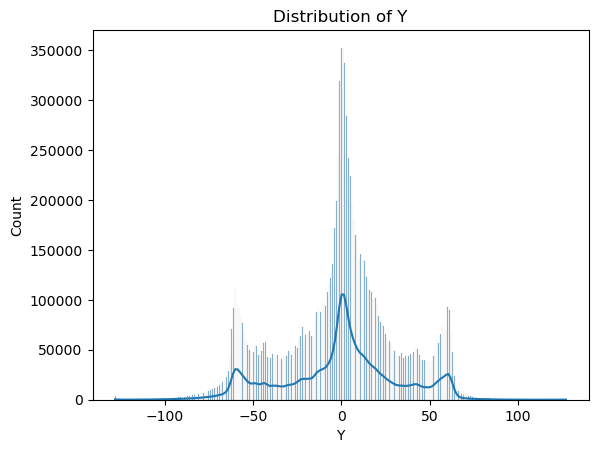

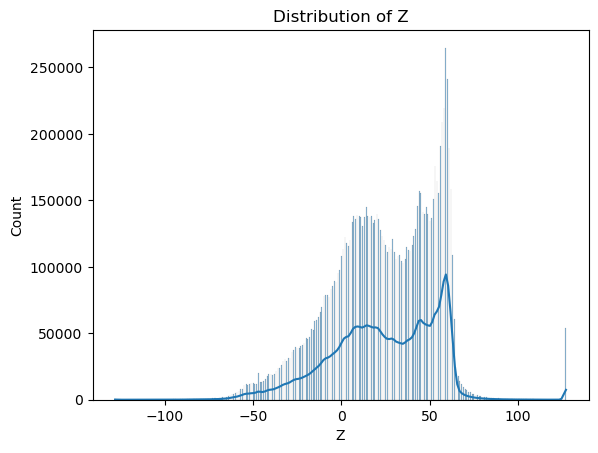

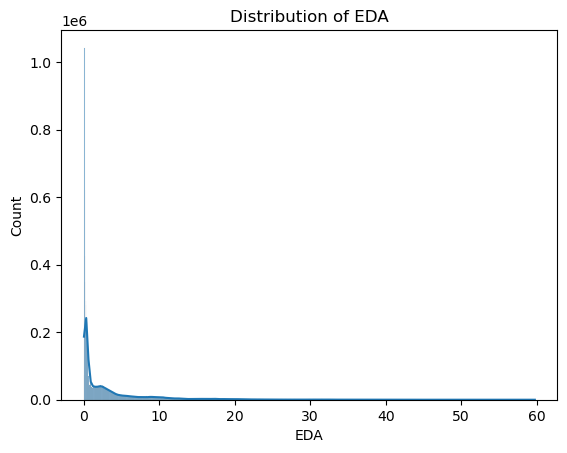

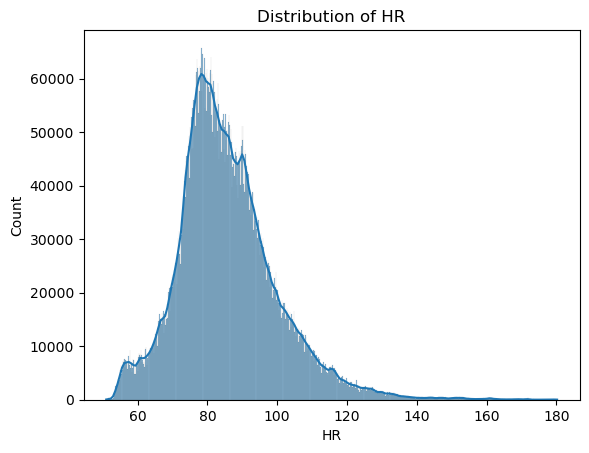

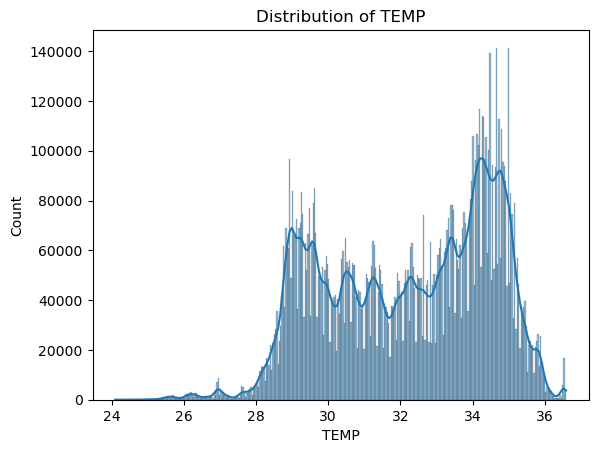

In [5]:
print("\nVisualizing the distribution of numeric columns...")
numeric_columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP']
for column in numeric_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Class Distribution in 'label':
label
2.0    8467619
0.0    2162245
1.0     773581
Name: count, dtype: int64


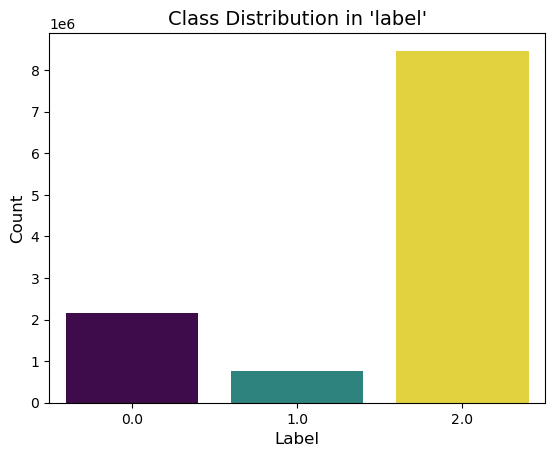

In [6]:
if 'label' in df.columns:
    print("\nClass Distribution in 'label':")
    print(df['label'].value_counts())
    sns.countplot(x='label', data=df, hue='label', palette='viridis', legend=False)  # Explicitly set `hue` to `x` variable
    plt.title("Class Distribution in 'label'", fontsize=14)
    plt.xlabel("Label", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


### Process the 'id' & 'datetime' column

In [7]:
if 'id' in df.columns:
    try:
        df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Convert to numeric, set invalid values to NaN
        print("\nProcessed 'id' column.")
    except Exception as e:
        print("Error processing 'id' column:", e)


Processed 'id' column.


In [8]:
if 'datetime' in df.columns:
    try:
        df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
        print("\nProcessed 'datetime' column.")
    except Exception as e:
        print("Error processing 'datetime' column:", e)


Processed 'datetime' column.


In [9]:
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print("\nScaled numeric columns.")


Scaled numeric columns.


In [10]:
# Drop unnecessary columns
columns_to_drop = ['datetime', 'id'] if 'datetime' in df.columns and 'id' in df.columns else []
df = df.drop(columns=columns_to_drop)

# Define features (X) and target (y)
X = df.drop(columns=['label'])
y = df['label']

# Handle class imbalance using Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)  # Initialize Random Undersampler
X_resampled, y_resampled = rus.fit_resample(X, y)  # Apply undersampling

print("\nClass distribution after random undersampling:")
print(pd.Series(y_resampled).value_counts())  # Check balanced class distribution



Class distribution after random undersampling:
label
0.0    773581
1.0    773581
2.0    773581
Name: count, dtype: int64


### Updated class distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14552\3707073869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')  # Count plot of resampled labels


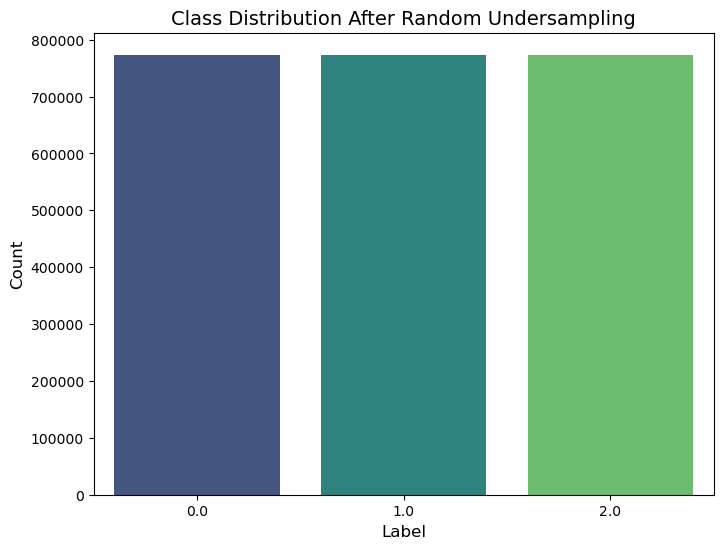

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette='viridis')  # Count plot of resampled labels
plt.title("Class Distribution After Random Undersampling", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print("\nData split into training and testing sets.")



Data split into training and testing sets.


In [13]:
# Train the rf model
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
print("\nModel trained successfully!")



Model trained successfully!


In [14]:
# Evaluate model performance
y_pred = rf_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    231859
         1.0       0.99      0.99      0.99    232165
         2.0       0.99      0.98      0.98    232199

    accuracy                           0.99    696223
   macro avg       0.99      0.99      0.99    696223
weighted avg       0.99      0.99      0.99    696223

Confusion Matrix:
 [[228956    570   2333]
 [   232 230805   1128]
 [  2160   1529 228510]]
Accuracy Score: 0.99


In [15]:
# Evaluate model performance in 100%
# Generate predictions
y_pred = rf_model.predict(X_test)

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Print the classification report with percentages
print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):  # Exclude 'accuracy', 'macro avg', etc.
        print(f"Class {label}:")
        for metric, value in metrics.items():
            print(f"  {metric.capitalize()}: {value * 100:.2f}%")
    else:
        print(f"{label.capitalize()}: {metrics * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy Score as a percentage
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy Score: {accuracy:.2f}%")



Classification Report:
Class 0.0:
  Precision: 98.97%
  Recall: 98.75%
  F1-score: 98.86%
  Support: 23185900.00%
Class 1.0:
  Precision: 99.10%
  Recall: 99.41%
  F1-score: 99.26%
  Support: 23216500.00%
Class 2.0:
  Precision: 98.51%
  Recall: 98.41%
  F1-score: 98.46%
  Support: 23219900.00%
Accuracy: 98.86%
Class macro avg:
  Precision: 98.86%
  Recall: 98.86%
  F1-score: 98.86%
  Support: 69622300.00%
Class weighted avg:
  Precision: 98.86%
  Recall: 98.86%
  F1-score: 98.86%
  Support: 69622300.00%

Confusion Matrix:
 [[228956    570   2333]
 [   232 230805   1128]
 [  2160   1529 228510]]
Accuracy Score: 98.86%
